<a href="https://colab.research.google.com/github/alaajomah/ML/blob/main/Gen_AI_mid_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tokenization**


# Word piece tokenization
Used in : BERT, DistilBERT, ALBERT, Electra

Developed at: Google (Schuster & Nakajima)

Key idea :
*  Selects merges that maximize likelihood (not just
most frequent pairs).
*  Uses a leading marker ## to denote subwords (“##ing”
,
“##tion”).

In [1]:
from transformers import AutoTokenizer


# We use 'bert-base-uncased' as the checkpoint.
# 'Uncased' converts all text to lowercase, which is standard for general BERT tasks.
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased")


# BERT uses WordPiece tokenization. It breaks down complex words into subwords
# to handle Out-Of-Vocabulary (OOV) terms. Subwords are denoted by '##'.
sentence = "Clinical translation of spatial transcriptomics is maturing across oncology and fibrotic disease. In immuno-oncology, spatial biomarkers such as programmed cell death protein 1/programmed death-ligand 1 (PD-1/PD-L1) expression, mismatch-repair status with microsatellite instability, tumor mutational burden, and inflammation or Cluster of Differentiation 8 (CD8)-cell gene signatures guide patient selection and companion diagnostics, improving response prediction and trial design. Spatial profiling also supports “seamless” precision trials and liquid-biopsy-enabled monitoring, accelerating approvals in biomarker-defined populations."
bert_tokens = tokenizer_bert.tokenize(sentence)
print("Length of WordPiece Tokens :", len(bert_tokens))
print("WordPiece Tokenization (BERT):", bert_tokens)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Length of WordPiece Tokens : 134
WordPiece Tokenization (BERT): ['clinical', 'translation', 'of', 'spatial', 'transcript', '##omics', 'is', 'mat', '##uring', 'across', 'on', '##cology', 'and', 'fi', '##bro', '##tic', 'disease', '.', 'in', 'im', '##mun', '##o', '-', 'on', '##cology', ',', 'spatial', 'bio', '##mark', '##ers', 'such', 'as', 'programmed', 'cell', 'death', 'protein', '1', '/', 'programmed', 'death', '-', 'ligand', '1', '(', 'pd', '-', '1', '/', 'pd', '-', 'l', '##1', ')', 'expression', ',', 'mis', '##mat', '##ch', '-', 'repair', 'status', 'with', 'micro', '##sat', '##elli', '##te', 'instability', ',', 'tumor', 'mutation', '##al', 'burden', ',', 'and', 'inflammation', 'or', 'cluster', 'of', 'differentiation', '8', '(', 'cd', '##8', ')', '-', 'cell', 'gene', 'signatures', 'guide', 'patient', 'selection', 'and', 'companion', 'diagnostic', '##s', ',', 'improving', 'response', 'prediction', 'and', 'trial', 'design', '.', 'spatial', 'prof', '##iling', 'also', 'supports', '“', 'se

# Sentence Piece tokenization
Used in: T5, ALBERT (variant), LLaMA (SPM-BPE), XLNet

Created by: Google

Key idea:
*  Supports two main algorithms:

      1. Unigram Language Model (primary)

      2. BPE (optional)
*   Excellent for multilingual training.

*   Spaces are part of vocabulary (using “▁” as a space symbol)


In [2]:
from transformers import AutoTokenizer

# Loading the tokenizer for T5 (Text-to-Text Transfer Transformer).
tokenizer_t5 = AutoTokenizer.from_pretrained("t5-small")


# T5 treats the input as a raw stream and includes spaces in the tokens.
# The underscore-like symbol ( ) represents a space.
sentence = " Clinical translation of spatial transcriptomics is maturing across oncology and fibrotic disease. In immuno-oncology, spatial biomarkers such as programmed cell death protein 1/programmed death-ligand 1 (PD-1/PD-L1) expression, mismatch-repair status with microsatellite instability, tumor mutational burden, and inflammation or Cluster of Differentiation 8 (CD8)-cell gene signatures guide patient selection and companion diagnostics, improving response prediction and trial design. Spatial profiling also supports “seamless” precision trials and liquid-biopsy-enabled monitoring, accelerating approvals in biomarker-defined populations."
t5_tokens = tokenizer_t5.tokenize(sentence)
print("Length of SentencePiece Tokens )", len(t5_tokens))
print("SentencePiece Tokenization (T5):", t5_tokens)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Length of SentencePiece Tokens ) 146
SentencePiece Tokenization (T5): ['▁Clinical', '▁translation', '▁of', '▁spatial', '▁transcript', 'omics', '▁is', '▁matur', 'ing', '▁across', '▁on', 'c', 'ology', '▁and', '▁', 'fibro', 'tic', '▁disease', '.', '▁In', '▁immuno', '-', 'on', 'c', 'ology', ',', '▁spatial', '▁bio', 'mark', 'ers', '▁such', '▁as', '▁programme', 'd', '▁cell', '▁death', '▁protein', '▁', '1/', 'programm', 'e', 'd', '▁death', '-', 'lig', 'and', '▁1', '▁(', 'PD', '-', '1/', 'PD', '-', 'L', '1)', '▁expression', ',', '▁mis', 'match', '-', 're', 'p', 'air', '▁status', '▁with', '▁micro', 's', 'a', 'tel', 'lite', '▁instability', ',', '▁tumor', '▁mutation', 'al', '▁burden', ',', '▁and', '▁inflammation', '▁or', '▁Cluster', '▁of', '▁Different', 'i', 'ation', '▁8', '▁(', 'CD', '8)', '-', 'cell', '▁gene', '▁signature', 's', '▁guide', '▁patient', '▁selection', '▁and', '▁companion', '▁diagnostic', 's', ',', '▁improving', '▁response', '▁prediction', '▁and', '▁trial', '▁design', '.', '▁Spa', '

# TicToken tokenization
Used in: GPT-3.5, GPT-4, GPT-4o, GPT-5

Purpose: High-performance tokenizer optimized for
OpenAI’s LLM architectures

Key idea :

*  A highly optimized Rust implementation.
*  Uses a variant of Byte-level BPE (byte fallback).
*  Fully deterministic and very fast.


In [3]:
!pip install tiktoken

import tiktoken

sentence = " Clinical translation of spatial transcriptomics is maturing across oncology and fibrotic disease. In immuno-oncology, spatial biomarkers such as programmed cell death protein 1/programmed death-ligand 1 (PD-1/PD-L1) expression, mismatch-repair status with microsatellite instability, tumor mutational burden, and inflammation or Cluster of Differentiation 8 (CD8)-cell gene signatures guide patient selection and companion diagnostics, improving response prediction and trial design. Spatial profiling also supports “seamless” precision trials and liquid-biopsy-enabled monitoring, accelerating approvals in biomarker-defined populations."

# We load the 'cl100k_base' encoding. This is the specific tokenizer used
# by GPT-4 and GPT-3.5-Turbo. It is different from BERT or T5 tokenizers.
enc = tiktoken.get_encoding("cl100k_base")

# Unlike BERT which gives strings, tiktoken converts text directly
# to a list of integers (Token IDs). This is how the model actually "reads" the text.
tokens = enc.encode(sentence)
print("Tokenized Output:", tokens)
print("Number of Tokens:", len(tokens))

# We convert the integers back to strings to visualize how the model splits the words.
# This helps us see if medical terms are being split excessively.
decoded_tokens = [enc.decode([t]) for t in tokens]
print("Decoded Tokens:", decoded_tokens[:])


Tokenized Output: [33135, 14807, 315, 29079, 36815, 24203, 374, 5634, 1711, 4028, 78970, 2508, 323, 16178, 4744, 292, 8624, 13, 763, 4998, 16711, 10539, 66, 2508, 11, 29079, 39538, 91141, 1778, 439, 56168, 2849, 4648, 13128, 220, 16, 14, 15252, 2106, 4648, 2922, 343, 438, 220, 16, 320, 23891, 12, 16, 16744, 35, 8288, 16, 8, 7645, 11, 36401, 5621, 12959, 2704, 449, 8162, 37568, 18652, 56399, 11, 36254, 5318, 1697, 23104, 11, 323, 37140, 477, 36480, 315, 34496, 7246, 220, 23, 320, 6620, 23, 7435, 5997, 15207, 33728, 8641, 8893, 6727, 323, 22489, 50518, 11, 18899, 2077, 20212, 323, 9269, 2955, 13, 75797, 56186, 1101, 11815, 1054, 325, 309, 1752, 863, 16437, 19622, 323, 14812, 1481, 72, 49292, 55292, 16967, 11, 69741, 83923, 304, 39538, 13152, 39817, 22673, 13]
Number of Tokens: 128
Decoded Tokens: [' Clinical', ' translation', ' of', ' spatial', ' transcript', 'omics', ' is', ' mat', 'uring', ' across', ' onc', 'ology', ' and', ' fib', 'rot', 'ic', ' disease', '.', ' In', ' imm', 'uno', '

# **Summarization**

In [4]:
# Install required libraries
!pip install -q transformers sentencepiece evaluate

# Imports
from transformers import pipeline
import evaluate

text = """
Clinical translation of spatial transcriptomics is maturing across oncology and fibrotic disease.
In immuno-oncology, spatial biomarkers such as programmed cell death protein 1/programmed death-ligand 1 (PD-1/PD-L1) expression,
mismatch-repair status with microsatellite instability, tumor mutational burden,
and inflammation or Cluster of Differentiation 8 (CD8)-cell gene signatures guide patient selection and companion diagnostics,
improving response prediction and trial design. Spatial profiling also supports “seamless” precision trials and liquid-biopsy-enabled monitoring,
accelerating approvals in biomarker-defined populations.
"""

# Build two summarization models

# Model A: BART (facebook/bart-large-cnn) is particularly strong at abstractive summarization (rewriting text).

summarizer_a = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    tokenizer="facebook/bart-large-cnn"
)

# Model B: T5-small , T5 treats summarization as a "text-to-text" problem.
summarizer_b = pipeline(
    "summarization",
    model="t5-small",
    tokenizer="t5-small"
)

# Generate summaries
summary_a = summarizer_a(
    text,
    max_length=75,   # max tokens in the summary
    min_length=40,    # min tokens in the summary
    do_sample=False   # deterministic (beam search)
)[0]["summary_text"]

summary_b = summarizer_b(
    text,
    max_length=75,
    min_length=40,
    do_sample=False
)[0]["summary_text"]

print("=== Model A (BART) Summary ===")
print(summary_a)
print("\n=== Model B (T5-small) Summary ===")
print(summary_b)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.3 MB/s eta 0:00:00


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=75) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


=== Model A (BART) Summary ===
In immuno-oncology, spatial biomarkers such as programmed cell death protein 1/programmed death-ligand 1 (PD-1/PD-L1) expression guide patient selection. Spatial profiling also supports “seamless” precision trials and liquid-biopsy-enabled monitoring.

=== Model B (T5-small) Summary ===
clinical translation of spatial transcriptomics is maturing across oncology and fibrotic disease . spatial biomarkers such as programmed cell death protein 1/programmed death-ligand 1 (PD-1/PD-L1) expression, mismatch-repair status with microsatellite instability, tumor mutational burden, and inflammation guide patient selection and companion diagnostics .


# **Evaluation**


1. Evaluate the models outputs using **Rouge score**


In [5]:
!pip install rouge_score

rouge = evaluate.load("rouge")

# We calculate ROUGE-1 for both models.
# Note: In this experiment, we use the original 'text' as the reference
# to measure how much information from the source was preserved.
rouge_a = rouge.compute(predictions=[summary_a], references=[text])["rouge1"]
rouge_b = rouge.compute(predictions=[summary_b], references=[text])["rouge1"]


# Calculate score for BART
print(f"Model A (BART)- ROUGE-1: {rouge_a:.4f}")

# Calculate score for T5
print(f"Model B (T5)  - ROUGE-1: {rouge_b:.4f}")

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a1daffcc1ba7fafa1059f96108264ad372cb01bf28b9f2bddc8b4113c0f6f5b4
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


Model A (BART)- ROUGE-1: 0.6050
Model B (T5)  - ROUGE-1: 0.7231


**👉 ROUGE-1 for Model B-T5 (0.72) is higher than Model A-BART (0.61).**

This indicates that Model B preserved a larger amount of important content words from the original medical paragraph, especially technical biomarkers such as mismatch-repair status, microsatellite instability, tumor mutational burden, and inflammation signatures.

2. Evaluate the models outputs using a simple **human evaluation rubric (clarity, correctness, coherence)**   
#
#

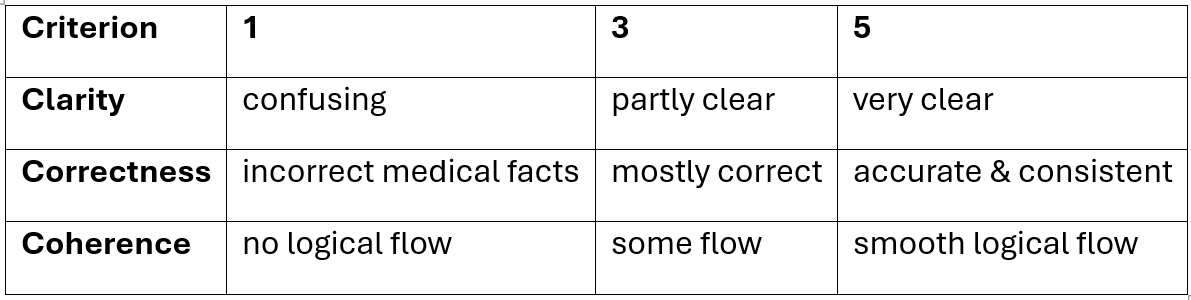
#
#
#

🔍 Evaluation of Model 1 (BART)


*   Clarity: 5/5
*   Correctness: 5/5
*   Coherence: 5/5
>Average = 5.00

#
#
#

🔍 Evaluation of Model 2 (T5-small)


*   Clarity: 3/5
*   Correctness: 5/5
*   Coherence: 3/5
>Average = 3.66

**📌Higher ROUGE scores do not always mean a "better" summary to a human reader.**

*  Although Model B (T5) achieved a higher ROUGE score (0.72) by copying text verbatim, it failed the human evaluation due to poor formatting (lowercase start) and incomplete context.

*  Model A (BART) proved superior for real-world use, delivering a coherent, grammatically perfect summary that captured the text's full conclusion despite a lower ROUGE score (0.60).
